<a href="https://colab.research.google.com/github/Sriansh-raj/Various-ML-Models-on-Budget-Dataset/blob/main/Financial_budget.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective
In this project we want to analyse the financial budget of India's Budget for each sector and how much revenue each ministry has made over the 2023-2024.
A budget analysis refers to a thorough review of a company's budget. It allows you to maximize the benefits associated with an effective budget.Learning what a budget analysis is can help you understand where a company is making money, where money is exiting the business and how to maximize profits.

## Load Dataset

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
# import chardet

# with open('MRFS_1_Union_Budget.csv', 'rb') as f:
#     encoding = chardet.detect(f.read())['encoding']

# print(encoding)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MRFS_1_Union_Budget.csv', encoding='windows-1252')
print(df.shape)

(159, 5)


# Data Preprocessing

In [ ]:
df.head()

,Ministry,Ministry/Demand,Budget Estimates2023-2024-Revenue,Budget Estimates2023-2024-Capital,Budget Estimates2023-2024-Total
0,Ministry of Agriculture and Farmers Welfare,Total,124982.96,52.83,125035.79
1,Ministry of Agriculture and Farmers Welfare,1. Department of Agriculture and Farmers Welfare,115489.37,42.42,115531.79
2,Ministry of Agriculture and Farmers Welfare,2. Department of Agricultural Research and Edu...,9493.59,10.41,9504.00
3,Department of Atomic Energy,Total,9096.99,15981.50,25078.49
4,Department of Atomic Energy,3. Atomic Energy,9096.99,15981.50,25078.49


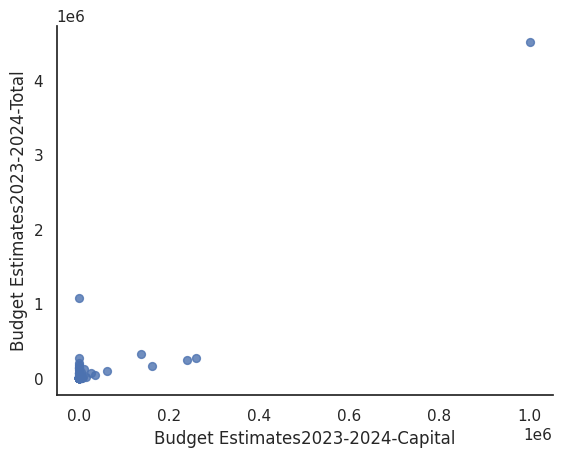

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Budget Estimates2023-2024-Capital', y='Budget Estimates2023-2024-Total', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

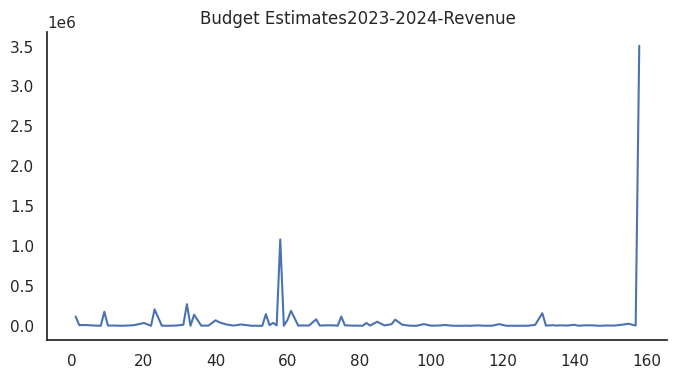

In [ ]:
from matplotlib import pyplot as plt
df['Budget Estimates2023-2024-Revenue'].plot(kind='line', figsize=(8, 4), title='Budget Estimates2023-2024-Revenue')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Ministry                           159 non-null    object 
 1   Ministry/Demand                    159 non-null    object 
 2   Budget Estimates2023-2024-Revenue  159 non-null    float64
 3   Budget Estimates2023-2024-Capital  159 non-null    float64
 4   Budget Estimates2023-2024-Total    159 non-null    float64
dtypes: float64(3), object(2)
memory usage: 6.3+ KB


 Now that we have collected relevant financial data for analysis. This includes budget allocations, actual spending,capital , revenue streams, expenses, and any other pertinent financial information such as Ministry/Demands.

Due to the presence of duplicated values and null,we perform  data cleansing to ensure accuracy and consistency. This involves tasks such as removing duplicates, handling missing values, standardizing formats, and converting data types if necessary. Prepare the data for analysis by organizing it in a format suitable for your analysis tools.

In [ ]:
df.describe(include='all')

,Ministry,Ministry/Demand,Budget Estimates2023-2024-Revenue,Budget Estimates2023-2024-Capital,Budget Estimates2023-2024-Total
count,159,159,1.590000e+02,1.590000e+02,1.590000e+02
unique,57,104,NaN,NaN,NaN
top,Ministry of Finance,Total,NaN,NaN,NaN
freq,14,56,NaN,NaN,NaN
mean,NaN,NaN,6.607805e+04,1.888606e+04,8.496410e+04
std,NaN,NaN,3.161468e+05,9.081947e+04,3.929888e+05
min,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,NaN,1.757450e+03,5.940000e+00,2.250485e+03
50%,NaN,NaN,4.661160e+03,5.283000e+01,5.806130e+03
75%,NaN,NaN,1.811199e+04,8.109750e+02,2.563138e+04


In [ ]:
df = df[df['Ministry/Demand'] != 'Total']

In [ ]:
df.head()

,Ministry,Ministry/Demand,Budget Estimates2023-2024-Revenue,Budget Estimates2023-2024-Capital,Budget Estimates2023-2024-Total
1,Ministry of Agriculture and Farmers Welfare,1. Department of Agriculture and Farmers Welfare,115489.37,42.42,115531.79
2,Ministry of Agriculture and Farmers Welfare,2. Department of Agricultural Research and Edu...,9493.59,10.41,9504.00
4,Department of Atomic Energy,3. Atomic Energy,9096.99,15981.50,25078.49
6,Ministry of AYUSH,4. Ministry of Ayush,3641.56,5.94,3647.50
8,Ministry of Chemicals and Fertilisers,5. Department of Chemicals and Petrochemicals,172.55,0.90,173.45


In [ ]:
df = df.dropna()

In [ ]:
df.isnull()

,Ministry,Ministry/Demand,Budget Estimates2023-2024-Revenue,Budget Estimates2023-2024-Capital,Budget Estimates2023-2024-Total
1,False,False,False,False,False
2,False,False,False,False,False
4,False,False,False,False,False
6,False,False,False,False,False
8,False,False,False,False,False
...,...,...,...,...,...
151,False,False,False,False,False
153,False,False,False,False,False
155,False,False,False,False,False
157,False,False,False,False,False


In [ ]:
df.isnull().sum()

Ministry                             0
Ministry/Demand                      0
Budget Estimates2023-2024-Revenue    0
Budget Estimates2023-2024-Capital    0
Budget Estimates2023-2024-Total      0
dtype: int64

In [ ]:
df = df.drop_duplicates()

# Train-test-split

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [ ]:
x = df[['Budget Estimates2023-2024-Revenue',	'Budget Estimates2023-2024-Capital']].values
y = df[['Budget Estimates2023-2024-Total']].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(77, 2)
(26, 2)
(77, 1)
(26, 1)


In [ ]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_train = y_train.ravel()

# Process Flow for EDA and Linear Regression Model:
### Data Collection and Loading:<br>
Obtained the 'Union-budget 2023-24' dataset and loaded it into the environment.<br>
### Data Cleaning and Preprocessing:
Handled missing values, outliers, and duplicates.<br>
### Exploratory Data Analysis (EDA):
Feature Engineering:
Created new features or transform existing ones to improve model performance.
### Model Building:
-> Split Data:
Divided the dataset into training and testing sets.<br>
-> Linear Regression:
Built a linear regression model using the training data.<br>
-> Made predictions on new data using the trained model.

# Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(x_test)
y_pred

array([ 34.7654834 ,  33.89729947,  33.05776714,  33.17549876,
        33.11272791,  33.2067294 ,  34.62024152,  33.07931691,
        33.26251041,  33.05341648,  33.1313412 ,  33.52195809,
        33.29892734,  51.22497135,  33.08115863,  33.30243455,
        43.65199308,  44.83615003,  33.21422145,  33.2742611 ,
        38.24806229, 467.58783199,  33.49761951,  33.12418515,
        33.34901226,  33.92956188])

In [ ]:
y_test

array([[2.54487500e+04],
       [1.24618800e+04],
       [7.01500000e+01],
       [1.25868000e+03],
       [8.22000000e+02],
       [2.24877000e+03],
       [2.21379500e+04],
       [3.40000000e+02],
       [3.11777000e+03],
       [9.31000000e+00],
       [1.16801000e+03],
       [5.98714000e+03],
       [3.64750000e+03],
       [2.70120140e+05],
       [3.80000000e+02],
       [3.51731000e+03],
       [1.57545000e+05],
       [1.75148480e+05],
       [2.40000000e+03],
       [3.28765000e+03],
       [7.72230000e+04],
       [4.50309745e+06],
       [5.43610000e+03],
       [1.01642000e+03],
       [4.32785000e+03],
       [9.89087000e+03]])

In [ ]:
accuracy = regressor.score(x_test, y_pred)
print(accuracy)

1.0


Text(0, 0.5, 'Y_Predictions_Data')

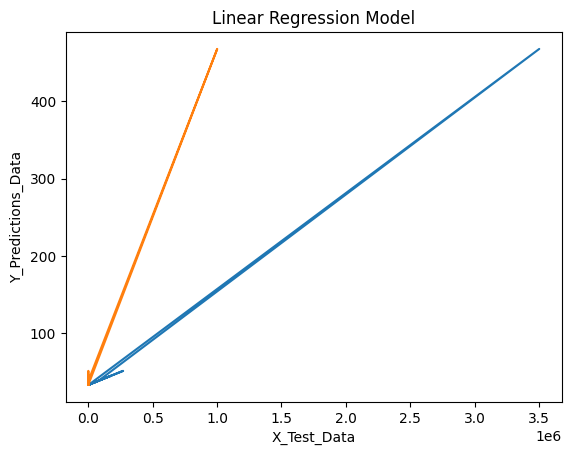

In [ ]:
plt.plot(x_test, y_pred)

plt.title("Linear Regression Model")
plt.xlabel("X_Test_Data")
plt.ylabel("Y_Predictions_Data")

# Naive Bayes Model

In [ ]:
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
clsfr = MultinomialNB()
clsfr.fit(x_train,y_train)

MultinomialNB()

In [ ]:
y_pred = clsfr.predict(x_test)
y_pred

array([61, 42, 27, 11, 18,  6, 27, 31, 69, 10, 69, 52, 15, 76, 12, 27, 62,
       63, 76, 72, 63, 17,  8, 10, 35, 16])

In [ ]:
y_test

array([[2.54487500e+04],
       [1.24618800e+04],
       [7.01500000e+01],
       [1.25868000e+03],
       [8.22000000e+02],
       [2.24877000e+03],
       [2.21379500e+04],
       [3.40000000e+02],
       [3.11777000e+03],
       [9.31000000e+00],
       [1.16801000e+03],
       [5.98714000e+03],
       [3.64750000e+03],
       [2.70120140e+05],
       [3.80000000e+02],
       [3.51731000e+03],
       [1.57545000e+05],
       [1.75148480e+05],
       [2.40000000e+03],
       [3.28765000e+03],
       [7.72230000e+04],
       [4.50309745e+06],
       [5.43610000e+03],
       [1.01642000e+03],
       [4.32785000e+03],
       [9.89087000e+03]])

In [ ]:
probabilities = clsfr.predict_proba(x_test)
print(probabilities)

[[0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 0.00000000e+000
  0.00000000e+000 1.87049424e-010]
 [0.00000000e+000 1.88672195e-226 6.68915252e-196 ... 0.00000000e+000
  0.00000000e+000 1.07269980e-149]
 [6.78318949e-019 3.59906136e-002 4.26385620e-002 ... 3.28596599e-090
  7.83065102e-015 7.18050220e-011]
 ...
 [1.39604579e-259 5.88616801e-007 1.83801467e-005 ... 0.00000000e+000
  1.32073533e-199 2.77907226e-093]
 [0.00000000e+000 7.77318469e-058 2.19225770e-048 ... 0.00000000e+000
  0.00000000e+000 8.25358398e-139]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]]


In [ ]:
accuracy = clsfr.score(x_test, y_pred)
print(accuracy)

1.0


Text(0, 0.5, 'Y_Predictions_Data')

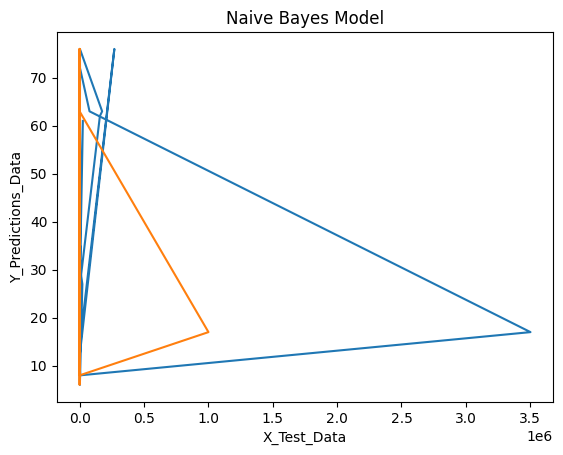

In [ ]:
plt.plot(x_test, y_pred)

plt.title("Naive Bayes Model")
plt.xlabel("X_Test_Data")
plt.ylabel("Y_Predictions_Data")

# SVM Model

In [ ]:
from sklearn import svm
from sklearn.svm import SVC, LinearSVC, NuSVC
import matplotlib.pyplot as plt

clf = svm.LinearSVC()
clf.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [ ]:
result = clf.predict(x_test)
print(result)

[3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [ ]:
y_test

array([[2.54487500e+04],
       [1.24618800e+04],
       [7.01500000e+01],
       [1.25868000e+03],
       [8.22000000e+02],
       [2.24877000e+03],
       [2.21379500e+04],
       [3.40000000e+02],
       [3.11777000e+03],
       [9.31000000e+00],
       [1.16801000e+03],
       [5.98714000e+03],
       [3.64750000e+03],
       [2.70120140e+05],
       [3.80000000e+02],
       [3.51731000e+03],
       [1.57545000e+05],
       [1.75148480e+05],
       [2.40000000e+03],
       [3.28765000e+03],
       [7.72230000e+04],
       [4.50309745e+06],
       [5.43610000e+03],
       [1.01642000e+03],
       [4.32785000e+03],
       [9.89087000e+03]])

In [ ]:
accuracy = clf.score(x_test,result)
print(accuracy)

1.0


Text(0, 0.5, 'Y_Predictions_Data')

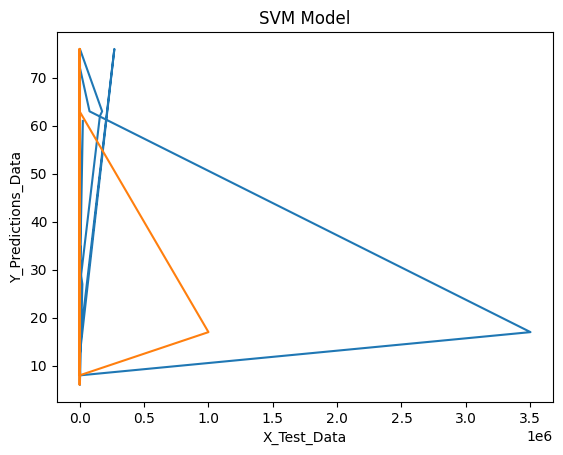

In [ ]:
plt.plot(x_test, y_pred)

plt.title("SVM Model")
plt.xlabel("X_Test_Data")
plt.ylabel("Y_Predictions_Data")

# Conclusion:
By following this process flow, we effectively conducted EDA and built a linear regression model using the 'Union-budget 2023-24' dataset. This structured approach ensures a systematic analysis of the data and the development of a robust predictive model.